<a href="https://colab.research.google.com/github/RozhanMk/Time-Series-Analysis/blob/master/Holt_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#!/bin/bash
!curl -L -o sandp500.zip\
  https://www.kaggle.com/api/v1/datasets/download/camnugent/sandp500

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 19.3M  100 19.3M    0     0  25.7M      0 --:--:-- --:--:-- --:--:-- 25.7M


In [ ]:
!unzip sandp500.zip

Archive:  sandp500.zip
replace all_stocks_5yr.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace getSandP.py? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace individual_stocks_5yr/__MACOSX/individual_stocks_5yr/._.DS_Store? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace individual_stocks_5yr/__MACOSX/individual_stocks_5yr/._AAPL_data.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace individual_stocks_5yr/__MACOSX/individual_stocks_5yr/._ABC_data.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
df = pd.read_csv('all_stocks_5yr.csv', index_col="date", parse_dates=True)
display(df.head())

,open,high,low,close,volume,Name
date,,,,,,
2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL


<Axes: xlabel='date'>

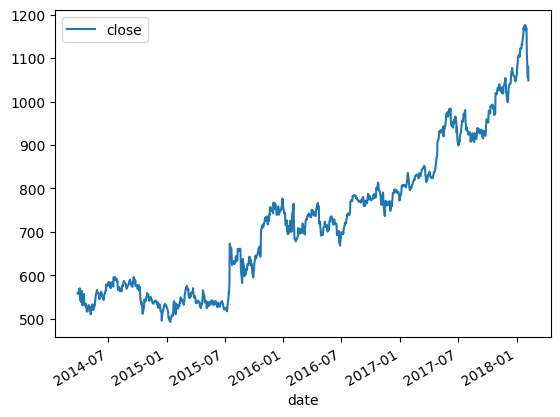

In [ ]:
df = df.loc[df['Name'] == 'GOOG']
df[["close"]].plot()

<Axes: xlabel='date'>

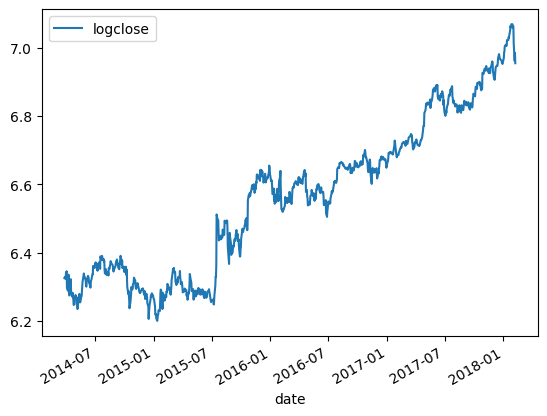

In [ ]:
df["logclose"] = np.log(df["close"])
df[["logclose"]].plot()

In [ ]:
N_test = 30
train_data = df[:-N_test]
test_data = df[-N_test:]
train_idx = train_data.index
test_idx = test_data.index

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


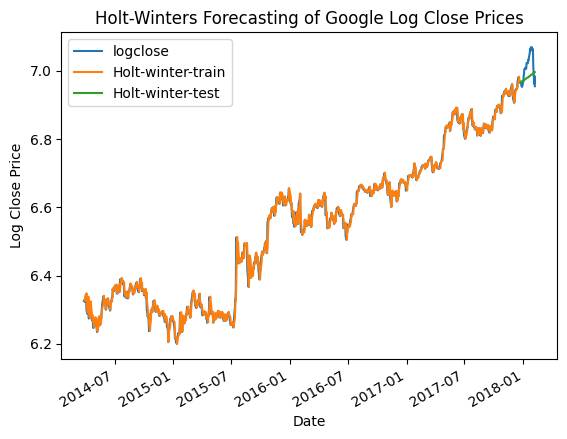

In [ ]:
from statsmodels.tsa.holtwinters import Holt

model = Holt(train_data['logclose'], initialization_method="legacy-heuristic")
fit1 = model.fit()

# Make predictions for the next 30 days
df.loc[train_idx, 'Holt-winter-train'] = fit1.fittedvalues
forecast = fit1.forecast(N_test)
forecast.index = test_data.index  # Align forecast index
df.loc[test_data.index, 'Holt-winter-test'] = forecast

# Plot the original data and the forecast
df[['logclose', 'Holt-winter-train', 'Holt-winter-test']].plot(label='Original')
plt.legend()
plt.title('Holt-Winters Forecasting of Google Log Close Prices')
plt.xlabel('Date')
plt.ylabel('Log Close Price')
plt.show()


<Axes: xlabel='date'>

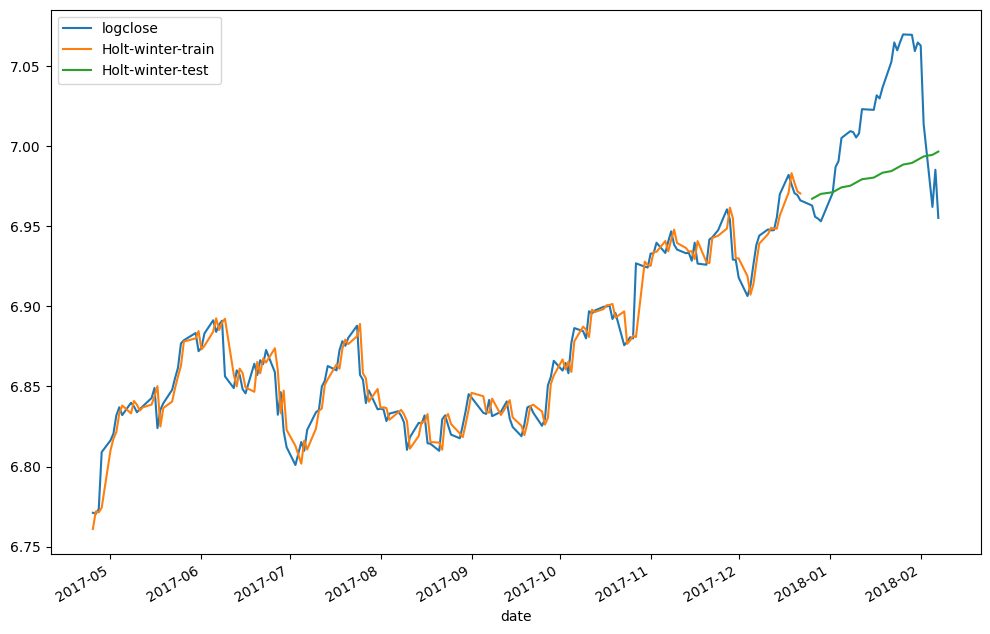

In [ ]:
df.iloc[-200:][['logclose',"Holt-winter-train", "Holt-winter-test"]].plot(figsize=(12, 8))